## image_1 : 김구라

In [832]:
# 패키지 로딩하기
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import dlib

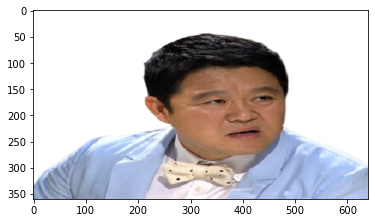

In [990]:
# 이미지 불러오기
img_path   = os.getenv("HOME") + "/aiffel/camera_sticker/images/image_1.png" # 이미지 경로와 파일 설정
img_read   = cv2.imread(img_path)                                            # cv2 패키지로 이미지를 읽음
img_resize = cv2.resize(img_read, (640, 360))                                # 640X360의 크기로 resize하기
img_rgb    = cv2.cvtColor(img_resize, cv2.COLOR_BGR2RGB)                     # 이미지를 BRG -> RGB로 변환하기(안하면 이상하게 사진이 나옴)
img_show   = img_rgb.copy()                                                  # 출력용 이미지 변수 만들기
plt.imshow(img_show)                                                         # 이미지 확인하기
plt.show()

rectangles[[(322, 116) (476, 270)]]


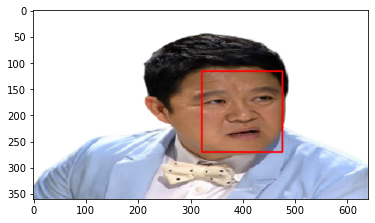

In [991]:
# detector 선언
detector = dlib.get_frontal_face_detector()
dlib_rects = detector(img_rgb, 1)
print(dlib_rects) # 찾은 얼굴영역 좌표 출력하기

# 얼굴부분에 네모칸 만들기
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    cv2.rectangle(img = img_show, pt1 = (l, t), pt2 = (r, b), color = (255, 0, 0), thickness = 2, lineType = cv2.LINE_AA)

plt.imshow(img_show)
plt.show()

In [992]:
# landmark 모델 불러오기
model_path = os.getenv("HOME") + "/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat"
landmark_predictor = dlib.shape_predictor(model_path)

In [994]:
landmark_list = []                                                # landmark를 넣을 리스트 미리 생성
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts())) # landmark 포인트 찾기
    landmark_list.append(list_points)                             # landmark를 미리 만든 리스트에 하나하나 추가하기
print(len(landmark_list[0]))                                      # 최종 landmark_list 갯수 확인하기

68


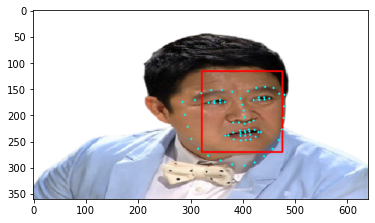

In [995]:
# 찾은 landmark들을 사진에 찍기
for landmark in landmark_list:
    for idx, point in enumerate(list_points):
        cv2.circle(img = img_show, center = point, radius = 2, color = (0, 255, 255), thickness = -1)

plt.imshow(img_show)
plt.show()

(155, 155, 3)


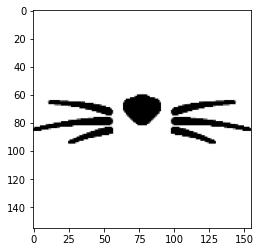

In [996]:
# 스티커 불러오기
sticker_path = os.getenv("HOME") + "/aiffel/camera_sticker/images/cat-whiskers.png" # 스티커 경로와 파일 설정
img_sticker  = cv2.imread(sticker_path)                                             # 스티커 읽어오기
img_sticker  = cv2.resize(img_sticker, (w, h))                                      # 스티커 resize
print(img_sticker.shape)                                                            # 스티커 shape 확인하기
plt.imshow(img_sticker)                                                             # 스티커 확인하기
plt.show()

In [997]:
# 좌표 확인해보기 - 30은 코의 중앙좌표
for dlib_rect, landmark in zip(dlib_rects, landmark_list):
    x = landmark[30][0]
    y = landmark[30][1]
    w = dlib_rect.width()
    h = dlib_rect.height()
    print("(x, y) : (%d, %d)" %(x, y))
    print("(w, h) : (%d, %d)" %(w, h))

(x, y) : (404, 204)
(w, h) : (155, 155)


In [998]:
refined_x = x - w // 2
refined_y = y - h // 2
print("(x, y) : (%d, %d)" %(refined_x, refined_y))

(x, y) : (327, 127)


<function matplotlib.pyplot.show(close=None, block=None)>

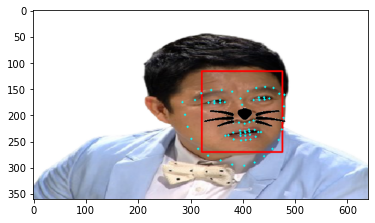

In [1002]:
# img_show로 먼저 스티커가 잘 붙었는지 확인하기
sticker_area = img_show[refined_y:img_sticker.shape[0] + refined_y, refined_x:refined_x + img_sticker.shape[1]]
img_show[refined_y:img_sticker.shape[0] + refined_y, refined_x:refined_x + img_sticker.shape[1]] = np.where(img_sticker == 255, sticker_area, img_sticker).astype(np.uint8)

plt.imshow(img_show)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

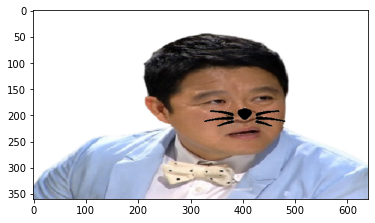

In [1003]:
# img_rgb에 이쁘게 스티커 붙이기
sticker_area = img_rgb[refined_y:img_sticker.shape[0] + refined_y, refined_x:refined_x + img_sticker.shape[1]]
img_rgb[refined_y:img_sticker.shape[0] + refined_y, refined_x:refined_x + img_sticker.shape[1]] = np.where(img_sticker == 255, sticker_area, img_sticker).astype(np.uint8)

plt.imshow(img_rgb)
plt.show

## image_2 : 승희

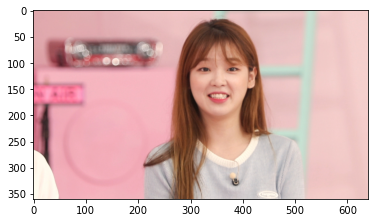

In [1040]:
# 이미지 불러오기
img_path   = os.getenv("HOME") + "/aiffel/camera_sticker/images/image_2.png" # 이미지 경로와 파일 설정
img_read   = cv2.imread(img_path)                                            # cv2 패키지로 이미지를 읽음
img_resize = cv2.resize(img_read, (640, 360))                                # 640X360의 크기로 resize하기
img_rgb    = cv2.cvtColor(img_resize, cv2.COLOR_BGR2RGB)                     # 이미지를 BRG -> RGB로 변환하기(안하면 이상하게 사진이 나옴)
img_show   = img_rgb.copy()                                                  # 출력용 이미지 변수 만들기
plt.imshow(img_show)                                                         # 이미지 확인하기
plt.show()

rectangles[[(306, 80) (414, 187)]]


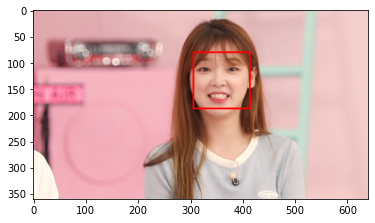

In [1041]:
# detector 선언
detector = dlib.get_frontal_face_detector()
dlib_rects = detector(img_rgb, 1)
print(dlib_rects) # 찾은 얼굴영역 좌표 출력하기

# 얼굴부분에 네모칸 만들기
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    cv2.rectangle(img = img_show, pt1 = (l, t), pt2 = (r, b), color = (255, 0, 0), thickness = 2, lineType = cv2.LINE_AA)

plt.imshow(img_show)
plt.show()

In [1042]:
# landmark 모델 불러오기
model_path = os.getenv("HOME") + "/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat"
landmark_predictor = dlib.shape_predictor(model_path)

In [1043]:
landmark_list = []                                                # landmark를 넣을 리스트 미리 생성
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts())) # landmark 포인트 찾기
    landmark_list.append(list_points)                             # landmark를 미리 만든 리스트에 하나하나 추가하기
print(len(landmark_list[0]))                                      # 최종 landmark_list 갯수 확인하기

68


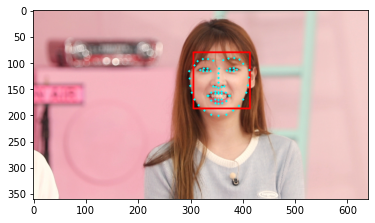

In [1044]:
# 찾은 landmark들을 사진에 찍기
for landmark in landmark_list:
    for idx, point in enumerate(list_points):
        cv2.circle(img = img_show, center = point, radius = 2, color = (0, 255, 255), thickness = -1)

plt.imshow(img_show)
plt.show()

(108, 109, 3)


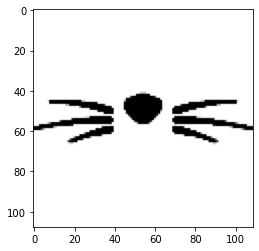

In [1045]:
# 스티커 불러오기
sticker_path = os.getenv("HOME") + "/aiffel/camera_sticker/images/cat-whiskers.png" # 스티커 경로와 파일 설정
img_sticker  = cv2.imread(sticker_path)                                             # 스티커 읽어오기
img_sticker  = cv2.resize(img_sticker, (w, h))                                      # 스티커 resize
print(img_sticker.shape)                                                            # 스티커 shape 확인하기
plt.imshow(img_sticker)                                                             # 스티커 확인하기
plt.show()

In [1046]:
# 좌표 확인해보기 - 30은 코의 중앙좌표
for dlib_rect, landmark in zip(dlib_rects, landmark_list):
    x = landmark[30][0]
    y = landmark[30][1]
    w = dlib_rect.width()
    h = dlib_rect.height()
    print("(x, y) : (%d, %d)" %(x, y))
    print("(w, h) : (%d, %d)" %(w, h))

(x, y) : (354, 138)
(w, h) : (109, 108)


In [1047]:
refined_x = x - w // 2
refined_y = y - h // 2
print("(x, y) : (%d, %d)" %(refined_x, refined_y))

(x, y) : (300, 84)


<function matplotlib.pyplot.show(close=None, block=None)>

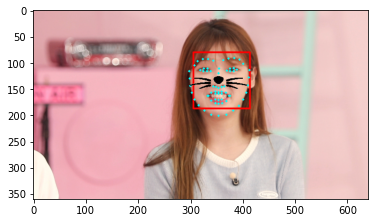

In [1048]:
# img_show로 먼저 스티커가 잘 붙었는지 확인하기
sticker_area = img_show[refined_y:img_sticker.shape[0] + refined_y, refined_x:refined_x + img_sticker.shape[1]]
img_show[refined_y:img_sticker.shape[0] + refined_y, refined_x:refined_x + img_sticker.shape[1]] = np.where(img_sticker == 255, sticker_area, img_sticker).astype(np.uint8)

plt.imshow(img_show)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

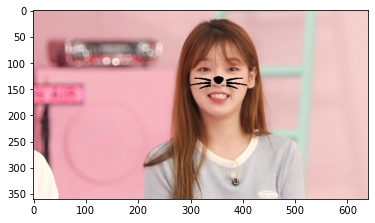

In [1049]:
# img_rgb에 이쁘게 스티커 붙이기
sticker_area = img_rgb[refined_y:img_sticker.shape[0] + refined_y, refined_x:refined_x + img_sticker.shape[1]]
img_rgb[refined_y:img_sticker.shape[0] + refined_y, refined_x:refined_x + img_sticker.shape[1]] = np.where(img_sticker == 255, sticker_area, img_sticker).astype(np.uint8)

plt.imshow(img_rgb)
plt.show

### 회고

In [ ]:
# 1. 어려웠던 점
# 사진을 가져와서 좌표를 계산해서 스티커를 원하는 위치에 붙이는 걸 처음해서 코드가 낯설었다. 때문에 코드를 이해하는 것부터 힘들었다.
# 또한 스티커를 가져와서 원하는 위치에 붙여야하는데 내가 지금 구한 x, y, refined_x, refined_y가 무엇을 뜻하고 어느 좌표를 뜻하는지 모르는 상태에서
# 코드를 수정하다보니 헛돌뿐...결과는 원하는 대로 나오지 않았다.
# 그래서 x와 y를 landmark의 30번(콧등)으로 주고 refined_x, refined_y를 x, y로 주고 좌표를 찍어보니 감이 잡혀서 왜 x - w // 2와 y - h // 2가
# 네모칸의 정중앙을 의미하는지 이해했다. 마지막에 스티커 붙이는 코드를 다르게 하면 구할 필요없이 붙일 수 있지 않을까...생각을 했지만
# 실력이 모자라 코드로 구현을 못 하겠다.

In [ ]:
# 2. 재밌던 점
# 비록 내 사진은 안 썼지만, 내가 원하는 사진을 내가 원하는 위치에 스티커를 붙이는 걸 프로그래밍으로 해보니 먼가 재밌고 내가 포토샵의 전문가가 된
# 기분을 느꼈다. 요즘 어플로 손 쉽게 할 수 있지만 코드로 짜면서 직접하니 어플을 이용하는게 아니라 나만의 어플을 만들어서 하는 느낌이 들었다.

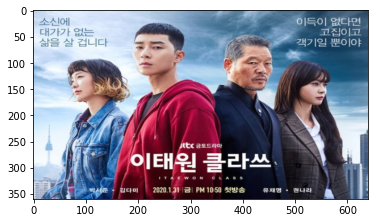

rectangles[[(395, 72) (469, 146)], [(521, 124) (573, 176)], [(175, 36) (265, 126)], [(60, 113) (112, 164)]]


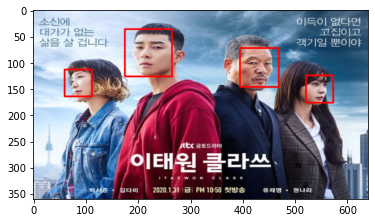

In [1092]:
# 이미지 불러오기
img_path   = os.getenv("HOME") + "/aiffel/camera_sticker/images/image_3.png" # 이미지 경로와 파일 설정
img_read   = cv2.imread(img_path)                                            # cv2 패키지로 이미지를 읽음
img_resize = cv2.resize(img_read, (640, 360))                                # 640X360의 크기로 resize하기
img_rgb    = cv2.cvtColor(img_resize, cv2.COLOR_BGR2RGB)                     # 이미지를 BRG -> RGB로 변환하기(안하면 이상하게 사진이 나옴)
img_show   = img_rgb.copy()                                                  # 출력용 이미지 변수 만들기
plt.imshow(img_show)                                                         # 이미지 확인하기
plt.show()


# detector 선언
detector = dlib.get_frontal_face_detector()
dlib_rects = detector(img_rgb, 1)
print(dlib_rects) # 찾은 얼굴영역 좌표 출력하기

# 얼굴부분에 네모칸 만들기
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    cv2.rectangle(img = img_show, pt1 = (l, t), pt2 = (r, b), color = (255, 0, 0), thickness = 2, lineType = cv2.LINE_AA)

plt.imshow(img_show)
plt.show()

68


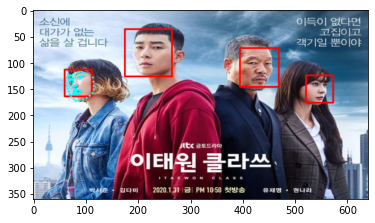

(53, 53, 3)


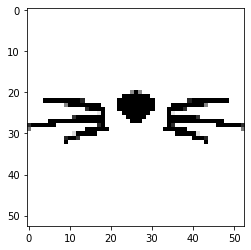

(x, y) : (442, 116)
(w, h) : (75, 75)
(x, y) : (557, 153)
(w, h) : (53, 53)
(x, y) : (210, 82)
(w, h) : (91, 91)
(x, y) : (76, 138)
(w, h) : (53, 52)
(x, y) : (50, 112)


<function matplotlib.pyplot.show(close=None, block=None)>

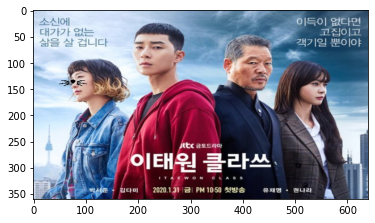

In [1093]:
# landmark 모델 불러오기
model_path = os.getenv("HOME") + "/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat"
landmark_predictor = dlib.shape_predictor(model_path)

landmark_list = []                                                # landmark를 넣을 리스트 미리 생성
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts())) # landmark 포인트 찾기
    landmark_list.append(list_points)                             # landmark를 미리 만든 리스트에 하나하나 추가하기
print(len(landmark_list[0]))                                      # 최종 landmark_list 갯수 확인하기


# 찾은 landmark들을 사진에 찍기
for landmark in landmark_list:
    for idx, point in enumerate(list_points):
        cv2.circle(img = img_show, center = point, radius = 2, color = (0, 255, 255), thickness = -1)

plt.imshow(img_show)
plt.show()


# 스티커 불러오기
sticker_path = os.getenv("HOME") + "/aiffel/camera_sticker/images/cat-whiskers.png" # 스티커 경로와 파일 설정
img_sticker  = cv2.imread(sticker_path)                                             # 스티커 읽어오기
img_sticker  = cv2.resize(img_sticker, (w, h))                                      # 스티커 resize
print(img_sticker.shape)                                                            # 스티커 shape 확인하기
plt.imshow(img_sticker)                                                             # 스티커 확인하기
plt.show()


# 좌표 확인해보기 - 30은 코의 중앙좌표
for dlib_rect, landmark in zip(dlib_rects, landmark_list):
    x = landmark[30][0]
    y = landmark[30][1]
    w = dlib_rect.width()
    h = dlib_rect.height()
    print("(x, y) : (%d, %d)" %(x, y))
    print("(w, h) : (%d, %d)" %(w, h))


refined_x = x - w // 2
refined_y = y - h // 2
print("(x, y) : (%d, %d)" %(refined_x, refined_y))


# img_show로 먼저 스티커가 잘 붙었는지 확인하기
sticker_area = img_show[refined_y:img_sticker.shape[0] + refined_y, refined_x:refined_x + img_sticker.shape[1]]
img_show[refined_y:img_sticker.shape[0] + refined_y, refined_x:refined_x + img_sticker.shape[1]] = np.where(img_sticker == 255, sticker_area, img_sticker).astype(np.uint8)

plt.imshow(img_show)
plt.show


# img_rgb에 이쁘게 스티커 붙이기
sticker_area = img_rgb[refined_y:img_sticker.shape[0] + refined_y, refined_x:refined_x + img_sticker.shape[1]]
img_rgb[refined_y:img_sticker.shape[0] + refined_y, refined_x:refined_x + img_sticker.shape[1]] = np.where(img_sticker == 255, sticker_area, img_sticker).astype(np.uint8)

plt.imshow(img_rgb)
plt.show